In [1]:
#2D Array format: [[N],[BodyLength],[LegLength],[tau_a], [F_a], [leg angle], [rPos], [xPos], [zPos]]

In [2]:
import numpy as np
from numpy import load
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
# load array
data = load('data.npy')
# print the array
print(data)

[[ 2.50000000e+01  2.50000000e+01  2.50000000e+01  2.50000000e+01
   2.50000000e+01  2.50000000e+01  2.50000000e+01  2.50000000e+01
   2.50000000e+01  2.50000000e+01  2.50000000e+01  2.50000000e+01
   2.50000000e+01  2.50000000e+01  2.50000000e+01  2.50000000e+01
   2.50000000e+01  2.50000000e+01  2.50000000e+01  2.50000000e+01
   2.50000000e+01  2.50000000e+01  2.50000000e+01  2.50000000e+01
   2.50000000e+01]
 [ 3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01]
 [ 3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.00000000e-01  3.00000000e-01
   3.00000000e-01  3.00000000e-01  3.0

25.0


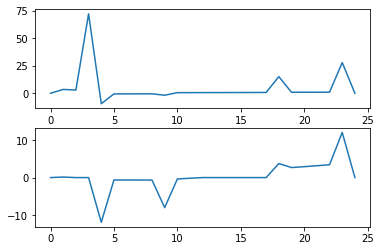

In [3]:
N = int(data[0][0])
print(data[0][0]) #m.coln, m.sgn,
f_avalues = np.zeros(N)
tau_values = np.zeros(N)
for i in range (1,N):
    f_avalues[i] = data[4][i]
    tau_values[i] =data[3][i]
    
f, axs = plt.subplots(2,1) #create axes



axs[0].plot(f_avalues)
axs[1].plot(tau_values)


In [4]:
lenBod = data[1][0]
lenLeg = data[2][0]
theta = data[5][:]
rPlot = data[6][:]
xPlot = data[7][:]
zPlot = data[8][:]


[0.20178871 0.20177678 0.2017532  0.20154816 0.21134634 0.21980012
 0.22038829 0.22095457 0.22149346 0.22200046 0.22523046 0.22515779
 0.22507323 0.22496328 0.22481728 0.22462681 0.2243852  0.22408724
 0.22372882 0.2132682  0.21257933 0.21177927 0.21087035 0.20994806
 0.20178871]


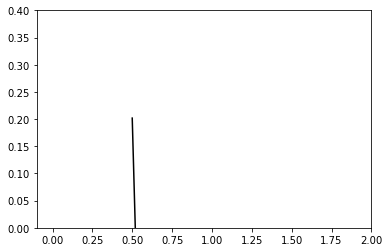

In [7]:

fig1, ax1 = plt.subplots(1,1) #create axes
#ax1.set_aspect('equal')
print(zPlot)
def plot_robot(i,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-0.1,2])
    ax.set_ylim([-0.0,0.4])
    
    thA = theta[i]
    leg1_xt = xPlot[i]
    leg1_yt = zPlot[i]
    leg1_xb = xPlot[i] + lenBod*np.cos(thA)
    leg1_yb = zPlot[i] - lenBod*np.sin(thA)
    ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color='xkcd:black')
    
    #plot leg 2
    Lt = 0.5*lenBod+ rPlot[i] - 0.5*lenLeg
    Lb = 0.5*lenBod + rPlot[i] + 0.5*lenLeg
    leg2_xt = xPlot[i] + Lt*np.cos(thA)
    leg2_yt = zPlot[i] - Lt*np.sin(thA)
    leg2_xb = xPlot[i] + Lb*np.cos(thA)
    leg2_yb = zPlot[i] - Lb*np.sin(thA)
   
    #ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color='xkcd:red')
    
update = lambda i: plot_robot(i,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(0,N),interval = 50 ,repeat=False)

HTML(animate.to_jshtml())